In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load cleaned dataset
data_path = "../data/cleaned_churn_data.csv"
df = pd.read_csv(data_path)

# Quick overview
print(df.shape)
df.head()


(7043, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [3]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (7043, 30)
Target shape: (7043,)


In [4]:
# Check for missing values
print("Missing values in X:\n", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X:
 0
Missing values in y: 0


In [5]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (5634, 30)
Test set shape: (1409, 30)


In [6]:
# Initialize scaler
scaler = StandardScaler()

# Fit on train, transform train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Train shape:", X_train_scaled.shape)
print("Scaled Test shape:", X_test_scaled.shape)


Scaled Train shape: (5634, 30)
Scaled Test shape: (1409, 30)


In [7]:
import numpy as np

# Save processed arrays
np.save("../data/X_train_scaled.npy", X_train_scaled)
np.save("../data/X_test_scaled.npy", X_test_scaled)
np.save("../data/y_train.npy", y_train.to_numpy())
np.save("../data/y_test.npy", y_test.to_numpy())


In [8]:
# Core libraries
import numpy as np
import pandas as pd

# ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib  # for saving/loading models

# SHAP library
import shap


In [9]:
# Load saved numpy arrays from Day 3
X_train = np.load("../data/X_train_scaled.npy")
X_test = np.load("../data/X_test_scaled.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Accuracy & classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7856635911994322

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



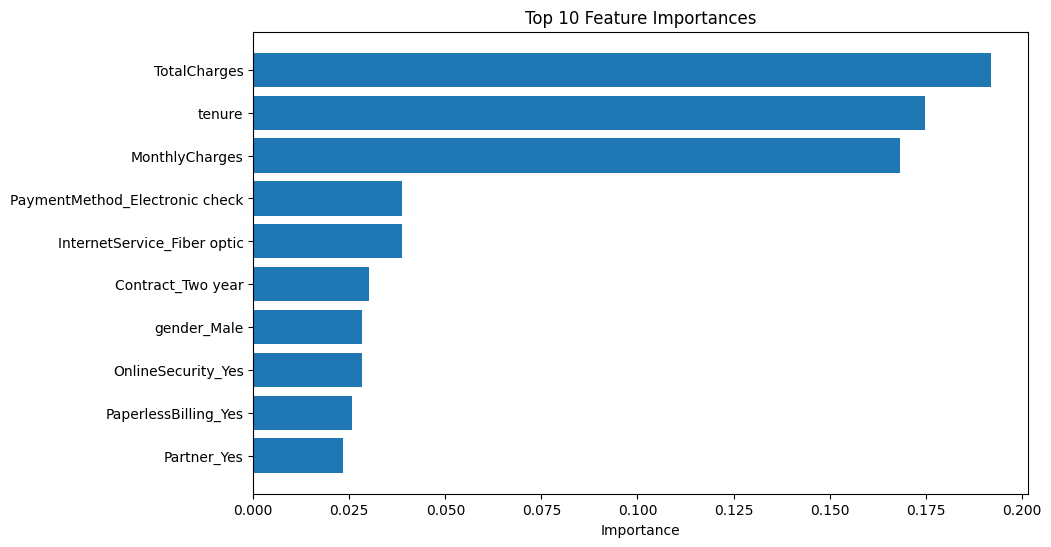

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# feature names from training
feature_names = df.drop('Churn', axis=1).columns

# get feature importances from trained model
importances = rf.feature_importances_

# create a DataFrame for plotting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:10][::-1], feat_imp['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving models


In [17]:
X_train = np.load("../data/X_train_scaled.npy")
X_test = np.load("../data/X_test_scaled.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7856635911994322
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



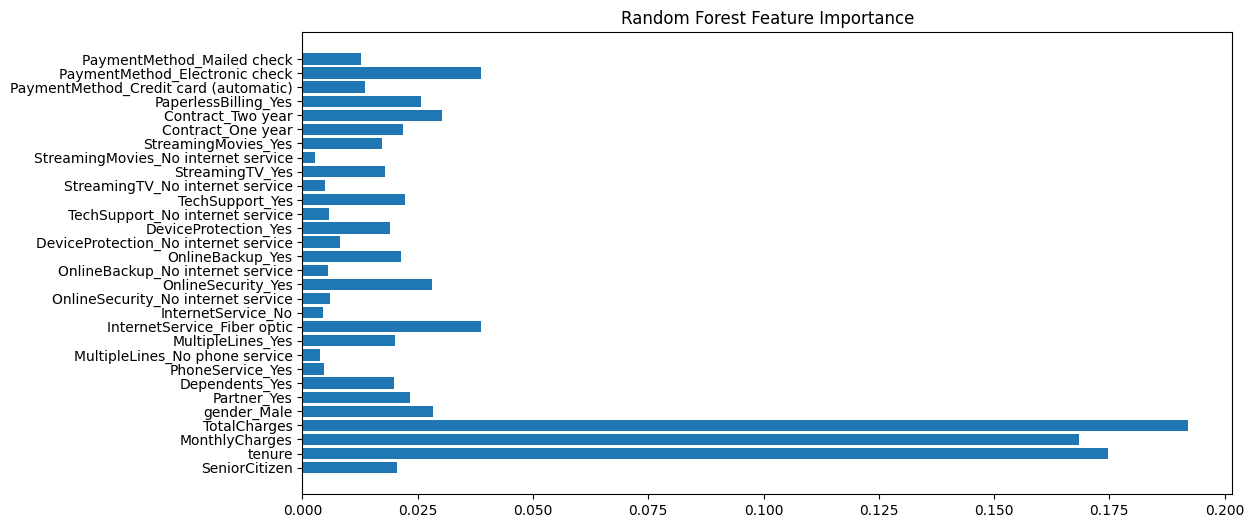

In [19]:
import matplotlib.pyplot as plt

feature_names = pd.read_csv("../data/cleaned_churn_data.csv").drop('Churn', axis=1).columns
importances = rf.feature_importances_

plt.figure(figsize=(12,6))
plt.barh(feature_names, importances)
plt.title("Random Forest Feature Importance")
plt.show()
